In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.options.display.max_columns=None

## 1. Import Dataset

### 1.1 US State Population

* Stores population by state from year 1990 to 2012

In [3]:
df = pd.read_csv('state-population.csv')
df.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


### 1.2 US Murder Rate by State

* Stores murder counts by state

In [4]:
murder_dataset = pd.read_csv('murders.csv')
murder_dataset.head()

,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


### 1.3 Housing Dataset

* Stores housing information (location, housing median age, total number of rooms/bedrooms, etc)

In [5]:
housing_data = pd.read_csv('housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.4 German Credit Data

* Stores credit data of individuals, purpose of load

In [6]:
#this dataframe, however, does not contain any information about the credibility of indivials
german_dataset = pd.read_csv('german_credit_data.csv',  index_col=0)
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [7]:
#this data contains credibility on individuals
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
dataset = pd.read_csv(path, delimiter=' ', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
#concat the two dataframes above to create a complete dataset
german_dataset = pd.concat([german_dataset, dataset.iloc[:,-1] - 1], axis=1)
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,20
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [9]:
#give names 'Risk'
german_dataset.rename(columns={20:'Risk'}, inplace=True)
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


# Exploratory Data Analysis (EDA)

The credibility and efficiency of machine learning algorithms is heavily dependent on both the quantity and quality of data in hands. Therefore, it is crucial we process our data well enough for machine learning algorithms to make complete use of. <br><br>

In Data Science, the purpose of data processing is to acquire data from the real world, process the data, create a well-organized dataset, and to make use of such data in machine learning algorithms. <br><br>

Data visualization and 5-number summary are commonly used to grasp a quick understanding of data.<br><br>

**5 Number Summary**:
1. The minimum value
2. The first quartile
3. The median
4. The third quartile
5. The maximum value

## 1. Type of Data

* Continuous : any value from a certain range
* Discrete : can only have integer values
* Categorical : ex. sex
* Binary : can only have two values 0/1, true/false. This is special case of categorical variables
* Ordinal : values with specific range of orders

## 2. Table

* Data table is basically consisted of columns and rows
* In statistics predictor variables or independent variables are used to predict response/dependent variables
* In data science, features are used to predict targets

## 3. Estimates of Location

* Mean
* Weighted mean
* Median
* Weighted median
* Trimmed mean : Mean without taking into consideration of extreme values
* Robust : values that are not much affected by outliers
* Outlier

### 3.1 Mean

In [10]:
df['population'].mean()

6805558.401347068

In [11]:
df.describe()

,year,population
count,2544.000000,2.524000e+03
mean,2001.500000,6.805558e+06
std,6.923547,2.855014e+07
min,1990.000000,1.013090e+05
25%,1995.750000,7.423805e+05
50%,2001.500000,1.597005e+06
75%,2007.250000,4.547104e+06
max,2013.000000,3.161288e+08


Year is a categorical variable<br>
수치형인지 아닌지 파악하기 위해 $\frac{a + b}{2}$가 의미가 있을때

### 3.2 Trimmed Mean

In [12]:
#the right 10%, left 10% are trimmed, and we only care about the middle 80%
stats.trim_mean(df['population'], 0.1)

2620227.3605108056

### 3.3 Median

In [13]:
df['population'].median()

1597005.0

## 4. Estimates of Variability

* Deviation : difference between observed outcome and estimates of location
* Variance : sum of variance squared divided by n-1.
* Standard deviation : square root of variance
* Mean absolute deviation : average of deviation from mean
* Median absolute deviation from the median : median deviation from mean
* Range : difference between data's minimum and maximum values
* Order statistics
* Percentile : a p-percent of values will be smaller or equal to a certain value
* Interquartile range : the difference between the 75th percentile and the 25th percentile (IQR)

### 4.1 Mean Absolute Deviation

average of deviation from mean

In [14]:
#use mad function
df.population.mad()

8238925.345578629

### 4.2 Variance and Standard Deviation

In [15]:
df.population.std()

28550144.966823243

In [16]:
stats.trim_mean(df['population'], 0.1)

2620227.3605108056

## 5. Visualization

### 5.1 Boxplot

In [17]:
population = murder_dataset['population']

In [18]:
#25th percentile
np.percentile(population, 25)

1696961.5

In [19]:
print("50th percentile : " + str(np.percentile(population, 50)))
print("Median : " + str(np.median(population)))

50th percentile : 4339367.0
Median : 4339367.0


In [20]:
#75th percentile
np.percentile(population, 75)

6636084.5

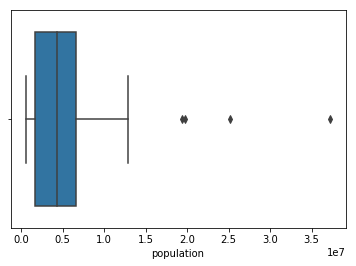

In [21]:
sns.boxplot(x=population)

minimum = Q1 − 1.5 × IQR<br>
maximum = Q3 + 1.5 × IQR

### 5.2 Histrogram

Text(0, 0.5, 'frequency')

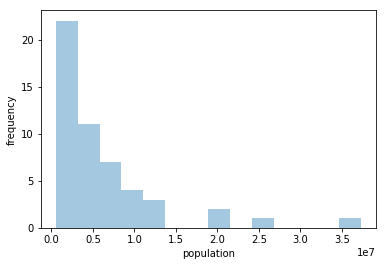

In [22]:
sns.distplot(population, kde=False)
plt.ylabel('frequency')

### 5.3 Density Plot

In [23]:
murder_dataset.head()

,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


In [24]:
murder_dataset['rate'] = murder_dataset['total'] / murder_dataset['population'] * 100000
murder_dataset.head()

,state,abb,region,population,total,rate
0,Alabama,AL,South,4779736,135,2.824424
1,Alaska,AK,West,710231,19,2.675186
2,Arizona,AZ,West,6392017,232,3.629527
3,Arkansas,AR,South,2915918,93,3.189390
4,California,CA,West,37253956,1257,3.374138


Text(0, 0.5, 'rate')

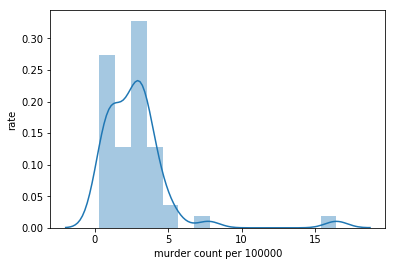

In [25]:
sns.distplot(murder_dataset.rate)
plt.xlabel('murder count per 100000')
plt.ylabel('rate')

## 6. Visualization of Binary and Categorical Data

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

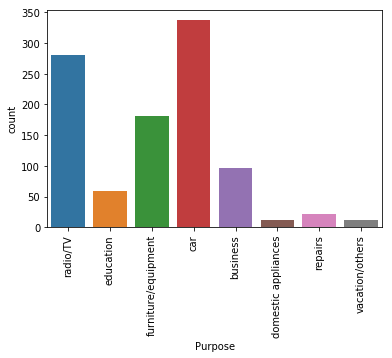

In [26]:
#what do people usually take loan for?
sns.countplot(x='Purpose', data=german_dataset)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

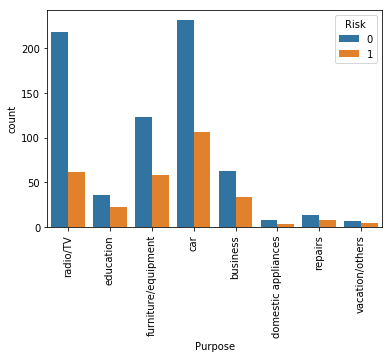

In [27]:
#for each category, differentiate people who are likely to pay back or not
sns.countplot(x='Purpose', hue='Risk', data=german_dataset)
plt.xticks(rotation=90)

## 7. Correlation

* Positive correlation : Y increases as X increases
* Negative correlation : Y decreases as X increases
* Correlation ranges from -1 to 1. Correlation of 0 means there is no correlation

In [28]:
housing_data.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### 7.1 Correlation table

In [29]:
corr = housing_data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


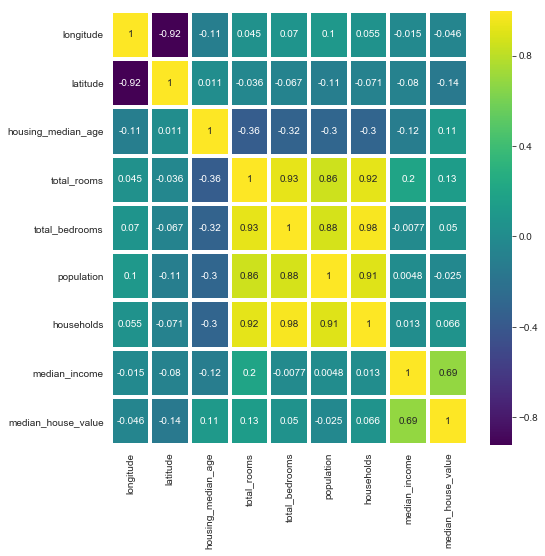

In [30]:
#using heatmap
sns.set({'figure.figsize': (8, 8), 'font.size': 10})
sns.heatmap(corr, cmap='viridis', annot=True, linewidth=3)

### 7.2 Scatter Matrix

In [31]:
from pandas.plotting import scatter_matrix

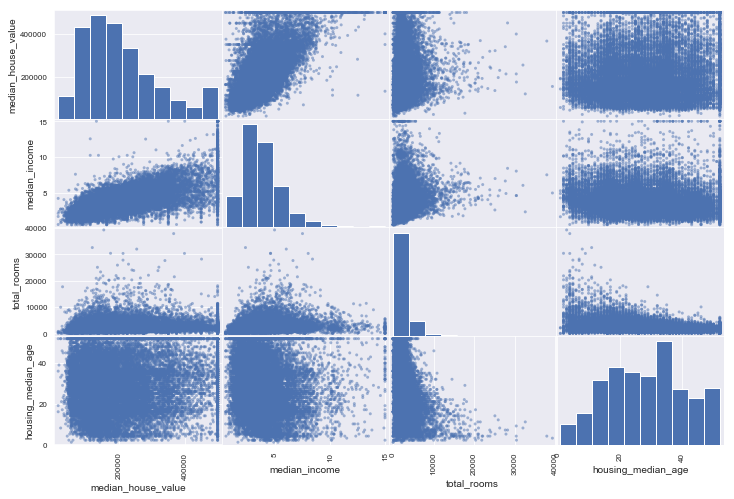

In [32]:
attrs = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_data[attrs], figsize=(12, 8))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


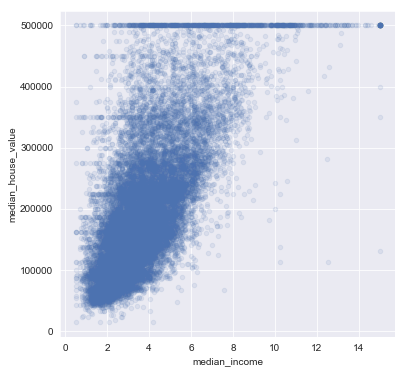

In [33]:
sns.set({'figure.figsize': (6, 6), 'font.size': 10})
housing_data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

## 8. Exploration of two or more variables

In [34]:
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [35]:
pd.crosstab([german_dataset['Sex'], german_dataset['Housing']], german_dataset['Risk'], margins=True)

Risk              0    1   All
Sex    Housing                
female free       8   11    19
       own      137   59   196
       rent      56   39    95
male   free      56   33    89
       own      390  127   517
       rent      53   31    84
All             700  300  1000

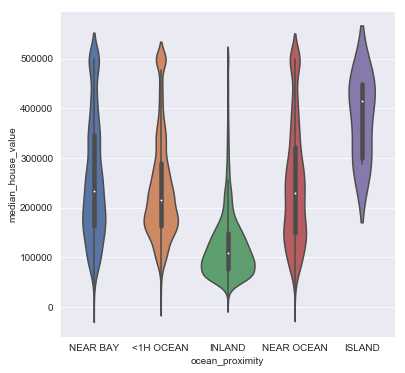

In [36]:
sns.violinplot(x='ocean_proximity', y='median_house_value', data=housing_data)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

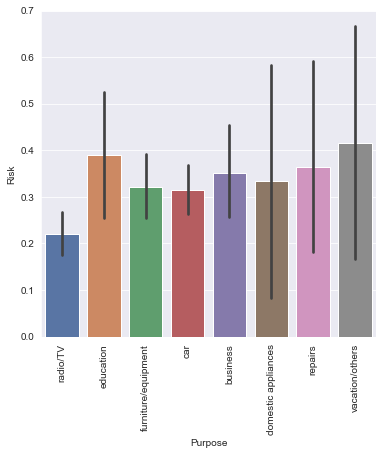

In [37]:
sns.barplot(x='Purpose', y='Risk', data=german_dataset)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

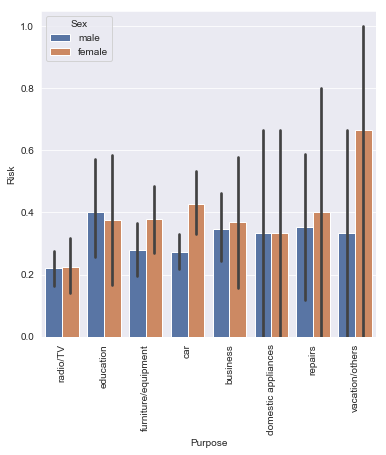

In [38]:
sns.barplot(x='Purpose', y='Risk', hue='Sex', data=german_dataset)
plt.xticks(rotation=90)